In [2]:
# Import dependencies
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Setup Splinter
executable_path={'executable_path':ChromeDriverManager().install()}
browser=Browser('chrome',**executable_path,headless=False)

In [4]:
# URL
url='https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [5]:
# Read html table using pandas
table=pd.concat(pd.read_html(url))
table.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [6]:
# Check the datatypes of the tables
table.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
# Change datatype for column 'terrestrial_date'
table['terrestrial_date'] =  pd.to_datetime(table['terrestrial_date'])
table.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [8]:
# Number of Months on Mars ()
months=table['month']
months.nunique()

# There are 12 months on Mars according to the provided data

12

In [8]:
# Calculate the number of martian days in scraped dataset
days=len(table)
days

1867

In [9]:
# Month with lowest and highest temperature on average
avg_temperature=table.groupby(['month']).mean()['min_temp']
avg_temperature.head(12)




month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Number of jobs')

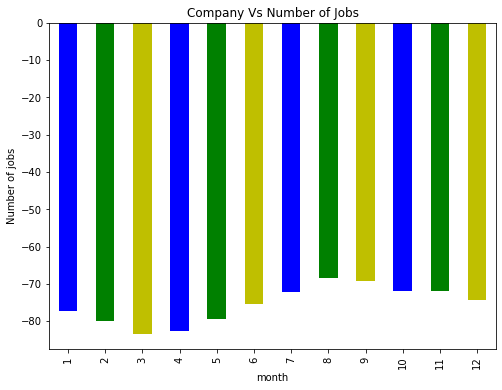

In [17]:
# Verification of lowest and highest average temperature by using bar plot
plt.figure(figsize=(8, 6))
avg_temperature.plot.bar(color=['b','g','y'])
plt.title("Months vs Average Temperature")
plt.ylabel("Average Temperature")

# Month 3 has the lowest average temperature on Mars that means it's the coldest month
# Month 8 has the highest average temperature on Mars that means it's the hottest month


In [19]:
# Month with lowest and highest atmospheric pressure on average
avg_pressure=table.groupby(['month']).mean()['pressure']
avg_pressure.head(12)



month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Average Pressure')

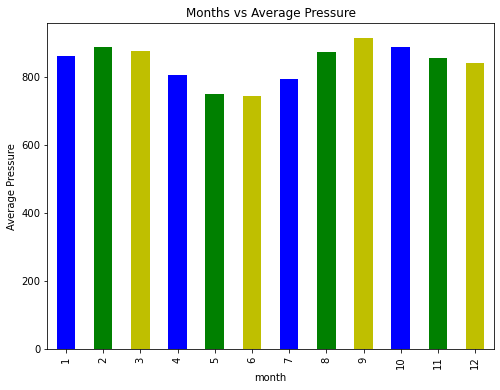

In [20]:
# Verification of lowest average temperature by using bar plot
plt.figure(figsize=(8, 6))
avg_pressure.plot.bar(color=['b','g','y'])
plt.title("Months vs Average Pressure")
plt.ylabel("Average Pressure")


# Month 6 has the lowest average atmospheric pressure on Mars
# Month 9 has the highest average atmospheric pressure on Mars

In [22]:
table["month"].value_counts().sort_index()
table.sol.nunique()

1867

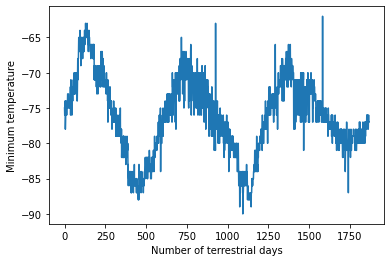

In [23]:
# How many terrestrial (earth) days are there in a Martian year?
table.min_temp.plot()
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()

# The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot.
# Internet search confirms that a Mars year is equivalent to 687 earth days.

In [25]:
# Export data to a csv file
table.to_csv("output/fileone.csv", index=False,header=True)